# Análise Descritiva dos Reviews
### Março de 2016

In [10]:
import sys
sys.path.append("../pylinguistics/pylinguistics/")

import Pylinguistics as pl
import pandas as pd
import plotsfunc as pf
import numpy as np
from scipy.stats import spearmanr
%matplotlib inline

reviews_features = pd.read_csv('reviews.csv.gz', compression='gzip')

## 1. Contagens Básicas

In [11]:
print('Reviews - Amostragem: %i' %len(reviews_features))
print('Reviews - Total de tokens no corpus: %i' % sum(reviews_features.word_count))

Reviews - Amostragem: 32226
Reviews - Total de tokens no corpus: 2103289


### 1.1 Categorias mais comentadas

In [12]:
df_agg = reviews_features[['word_count','category']].groupby(['category']).agg(['count','mean'])
df_agg['word_count'].sort_values('count',ascending=False).head(10)

,count,mean
category,,
TV,5748,69.491997
Celular e Smartphone,4985,79.095085
Camera Digital,2243,66.487294
Notebook,1407,65.659559
Ar Condicionado,1406,60.781650
Tablet,1306,67.910413
Geladeira / Refrigerador,1047,74.074499
Perfume,959,40.823775
Maquina de Lavar Roupas,945,82.765079


### 1.2 Tokens

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


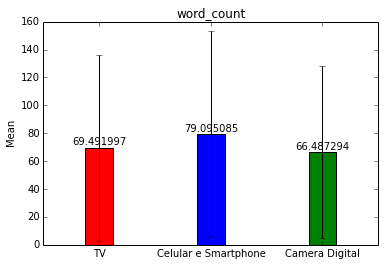

In [13]:
pf.comparaMedias(reviews_features,'word_count',['TV','Celular e Smartphone','Camera Digital'])

### 1.3 Sentenças

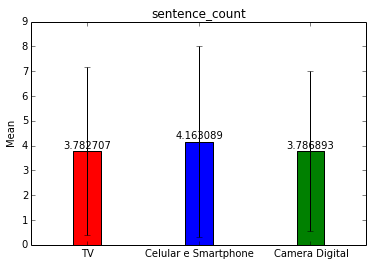

In [14]:
pf.comparaMedias(reviews_features,'sentence_count',['TV','Celular e Smartphone','Camera Digital'])

### 1.4 Tokens por sentença

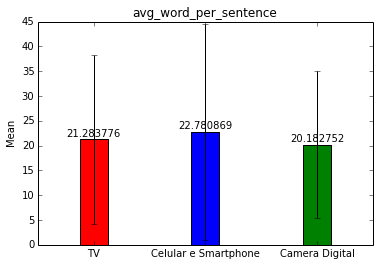

In [15]:
pf.comparaMedias(reviews_features,'avg_word_per_sentence',['TV','Celular e Smartphone','Camera Digital'])

### 1.5 Sílabas por token

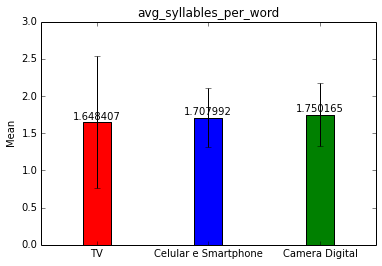

In [16]:
pf.comparaMedias(reviews_features,'avg_syllables_per_word',['TV','Celular e Smartphone','Camera Digital'])

In [17]:
mean_tv = reviews_features[reviews_features.category == 'TV'].groupby(['category']).agg(['mean'])
mean_cell = reviews_features[reviews_features.category == 'Celular e Smartphone'].groupby(['category']).agg(['mean'])
mean_camera = reviews_features[reviews_features.category == 'Camera Digital'].groupby(['category']).agg(['mean'])
most_cat = pd.concat([mean_tv, mean_cell, mean_camera])

### 1.6 Características Lógicas

In [18]:
most_cat[['LogicOperatorsIncidence','LogicIfIncidence','LogicAndIncidence','LogicOrIncidence','LogicNegationIncidence']]

,LogicOperatorsIncidence,LogicIfIncidence,LogicAndIncidence,LogicOrIncidence,LogicNegationIncidence
,mean,mean,mean,mean,mean
category,,,,,
TV,65.616748,2.856635,27.689322,1.338335,33.732457
Celular e Smartphone,65.215880,3.408774,28.573739,1.302160,31.931207
Camera Digital,65.440287,2.811543,25.931947,1.072281,35.624515


### 1.7 Características Sintáticas

In [19]:
most_cat[['pronIncidence','verbIncidence','nounIncidence','adjectiveIncidence','advIncidence']]

,pronIncidence,verbIncidence,nounIncidence,adjectiveIncidence,advIncidence
,mean,mean,mean,mean,mean
category,,,,,
TV,1.739341,52.328119,612.958787,110.586038,4.431607
Celular e Smartphone,1.676369,55.065272,604.276461,116.388110,5.401710
Camera Digital,1.595599,51.031340,604.530377,113.674527,4.239591


### 1.8 Outras Características

In [20]:
most_cat[['LexicalDiversty','ContentDiversty','ConnectiveTemporalIncidence','ConnectiveCasualIncidence']]

,LexicalDiversty,ContentDiversty,ConnectiveTemporalIncidence,ConnectiveCasualIncidence
,mean,mean,mean,mean
category,,,,
TV,0.749240,0.797425,0.503537,0.149189
Celular e Smartphone,0.741338,0.793429,0.376773,0.049271
Camera Digital,0.748507,0.798338,0.316019,0.121617


## 2. Inteligibilidade

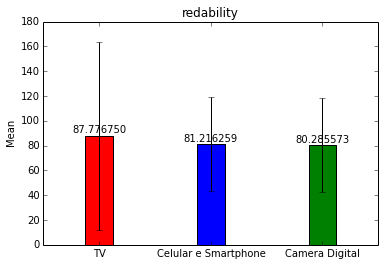

In [21]:
pf.comparaMedias(reviews_features,'redability',['TV','Celular e Smartphone','Camera Digital'])

## 3. Helpfulness

In [22]:
## adiciona coluna de helpfulness no corpus
def helpf(x): 
    try:
        return float ( float(x['thumbsup']) / (float(x['thumbsup']) + float(x['thumbsdown'])) )
    except:
        return 0
reviews_features['helpfulness'] = reviews_features.apply(helpf,axis=1)
## para usar no weka
## reviews_features.to_csv('reviews-help.csv',encoding='utf-8')

## 4. Correlações

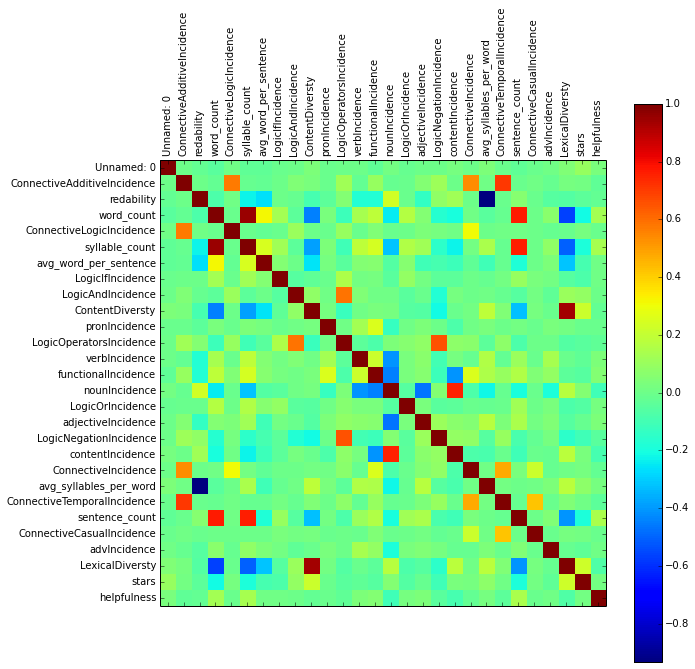

In [23]:
pf.plot_corr(reviews_features)

### 4.1 Correlação de Pearson sobre Helpfulness

In [24]:
np.corrcoef(reviews_features['sentence_count'],reviews_features['helpfulness'])

array([[ 1.        ,  0.14181221],
       [ 0.14181221,  1.        ]])

In [25]:
np.corrcoef(reviews_features['word_count'],reviews_features['helpfulness'])

array([[ 1.        ,  0.12937658],
       [ 0.12937658,  1.        ]])

In [26]:
np.corrcoef(reviews_features['syllable_count'],reviews_features['helpfulness'])

array([[ 1.        ,  0.13650037],
       [ 0.13650037,  1.        ]])

In [27]:
np.corrcoef(reviews_features['avg_syllables_per_word'],reviews_features['helpfulness'])

array([[ 1.        ,  0.02022862],
       [ 0.02022862,  1.        ]])

In [28]:
np.corrcoef(reviews_features['stars'],reviews_features['helpfulness'])

array([[ 1.        ,  0.01381401],
       [ 0.01381401,  1.        ]])

In [29]:
np.corrcoef(reviews_features['LogicIfIncidence'],reviews_features['helpfulness'])

array([[ 1.      ,  0.007919],
       [ 0.007919,  1.      ]])

In [30]:
np.corrcoef(reviews_features['ConnectiveIncidence'],reviews_features['helpfulness'])

array([[ 1.       , -0.0217736],
       [-0.0217736,  1.       ]])

In [31]:
np.corrcoef(reviews_features['ConnectiveTemporalIncidence'],reviews_features['helpfulness'])

array([[ 1.        , -0.03607318],
       [-0.03607318,  1.        ]])

In [32]:
np.corrcoef(reviews_features['avg_word_per_sentence'],reviews_features['helpfulness'])

array([[ 1.       ,  0.0046235],
       [ 0.0046235,  1.       ]])

### 4.2 Correlação de Spearman

In [33]:
spearmanr(reviews_features['sentence_count'],reviews_features['helpfulness'])

(0.10539499206271018, 2.8945837761401704e-80)

In [34]:
spearmanr(reviews_features['word_count'],reviews_features['helpfulness'])

(0.092719123416545327, 1.8364598318225347e-62)

In [35]:
spearmanr(reviews_features['syllable_count'],reviews_features['helpfulness'])

(0.10349261765617228, 1.9087412237240529e-77)

In [36]:
spearmanr(reviews_features['avg_syllables_per_word'],reviews_features['helpfulness'])

(0.03692347543479739, 3.3487172154980535e-11)

In [37]:
spearmanr(reviews_features['stars'],reviews_features['helpfulness'])

(0.029069664387250106, 1.7953196307180541e-07)

### 4.3 Correlações Combinadas

In [38]:
## função para combinar colunas
def sentPword(x): 
    try:
        return float(x['sentence_count']) + float(x['word_count'])
    except:
        return 0
reviews_features['sent_word_count'] = reviews_features.apply(sentPword,axis=1)

In [39]:
np.corrcoef(reviews_features['avg_word_per_sentence'],reviews_features['helpfulness'])

array([[ 1.       ,  0.0046235],
       [ 0.0046235,  1.       ]])

## 5. Análises no Weka

### 5.1 Ranker + ReliefAttributeEval , target helpfulness

In [40]:
%%html
<style> table {float:left} </style>

score | attribute
 :- |-------------:
 0.5176086 | thumbsdown
 0.472665 | thumbsup
 0.0063871 | sentence_count
 0.0044643 | word_count
 0.0032982 | stars
 0.0023554 | syllable_count
 0.0016757 | LogicIfIncidence
 0.001165 | ConnectiveIncidence
 0.0010448 | ContentDiversty
 0.0010135 | ConnectiveTemporalIncidence
 0.000998 | LogicOrIncidence
 0.0008688 | ConnectiveAdditiveIncidence
 0.0006316 | LexicalDiversty
 0.0005297 | ConnectiveCasualIncidence
 0.000465 | avg_word_per_sentence
 0.0003471 | LogicAndIncidence
 0.000189  |  ConnectiveLogicIncidence
 0.0001392  | LogicOperatorsIncidence
 0.0000577  | redability